In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
CarsData_Train = pd.read_excel("E:\\Artificial Intellingence\\1st term\ML\\HomeWorks\\1\\data\\train.xlsx")
CarsData_Val = pd.read_excel("E:\\Artificial Intellingence\\1st term\ML\\HomeWorks\\1\\data\\val.xlsx")
CarsData_Test = pd.read_excel("E:\\Artificial Intellingence\\1st term\ML\\HomeWorks\\1\\data\\test.xlsx")

--------------------------------------------------------------------------------------preprocessing---------------------------------------------------------------------------------------


In [3]:
#identify categorical columns

cols = CarsData_Train.columns
num_cols = CarsData_Train._get_numeric_data().columns
cat_cols = list(set(cols)-set(num_cols))
cat_cols

['Color', 'Fuel_Type']

In [4]:
# Get one hot encoding of columns Fuel_Type and color
one_hot1_Train = pd.get_dummies(CarsData_Train['Fuel_Type'])
one_hot2_Train = pd.get_dummies(CarsData_Train['Color'])
# Drop column Fuel_Type and color as they are now encoded
Train = CarsData_Train.drop(['Fuel_Type','Color'],axis = 1)
# Join the encoded df
Train = Train.join(one_hot1_Train.join(one_hot2_Train))


#do the same for val and test data
one_hot1_Val = pd.get_dummies(CarsData_Val['Fuel_Type'])
one_hot2_Val = pd.get_dummies(CarsData_Val['Color'])
# Drop column Fuel_Type and color as they are now encoded
Val = CarsData_Val.drop(['Fuel_Type','Color'],axis = 1)
# Join the encoded df
Val = Val.join(one_hot1_Val.join(one_hot2_Val))



one_hot1_Test = pd.get_dummies(CarsData_Test['Fuel_Type'])
one_hot2_Test = pd.get_dummies(CarsData_Test['Color'])
# Drop column Fuel_Type and color as they are now encoded
Test = CarsData_Test.drop(['Fuel_Type','Color'],axis = 1)
# Join the encoded df
Test = Test.join(one_hot1_Test.join(one_hot2_Test))

In [5]:
#make column index indentical

ColorsNotinVal = [value for value in list(CarsData_Train.Color.unique()) if value not in list(CarsData_Val.Color.unique())]
ColorsNotinTest = [value for value in list(CarsData_Train.Color.unique()) if value not in list(CarsData_Test.Color.unique())]

Fuel_TypeNotinVal= [value for value in list(CarsData_Train.Fuel_Type.unique()) if value not in list(CarsData_Val.Fuel_Type.unique())]
Fuel_TypeNotinTest= [value for value in list(CarsData_Train.Fuel_Type.unique()) if value not in list(CarsData_Test.Fuel_Type.unique())]

for value in (ColorsNotinVal+Fuel_TypeNotinVal) :
    Val[value]=0
for value in (ColorsNotinTest+Fuel_TypeNotinTest):
    Test[value]=0

Val = Val[list(Train.columns)]
Test = Test[list(Train.columns)]

In [6]:
X_Train = Train.iloc[: , 1:]
Y_Train = Train.iloc[: , [0]]

X_Val = Val.iloc[: , 1:]
Y_Val = Val.iloc[: , [0]]

X_Test = Test.iloc[: , 1:]
Y_Test = Test.iloc[: , [0]]

In [7]:
columns = list(X_Train.columns)
X_Train["intercept"]=1
X_Train=X_Train[["intercept"]+columns]


X_Val["intercept"]=1
X_Val=X_Val[["intercept"]+columns]


X_Test["intercept"]=1
X_Test=X_Test[["intercept"]+columns]

------------------------------------------------------------------------------------------Part One---------------------------------------------------------------------------------------

In [8]:

I = np.eye(X_Train.shape[1])

def get_w(lam) :
    return np.linalg.inv( X_Train.T @ X_Train + lam*I) @ X_Train.T @ Y_Train

In [9]:
for lam in [ 1 , 0.5 , 0.25 , 0.1 , 0.01 , 0.001 , 0]:
    w = get_w(lam)
    predict = np.dot(X_Val,w)
    print(lam,">>>", ((np.dot((Y_Val-predict).T,Y_Val-predict))/len(Y_Val)))      # Mean Squared Error

1 >>> [[1243447.49173475]]
0.5 >>> [[1245088.60404562]]
0.25 >>> [[1245976.6955744]]
0.1 >>> [[1246539.18892093]]
0.01 >>> [[1246890.24941312]]
0.001 >>> [[1246926.0078449]]
0 >>> [[1.14909185e+15]]


conclusion  :  best lambda is <1>

In [10]:
w = get_w(1)
#prediction on train data
Train_Predict = np.dot(X_Train,w)
Train_MSE = (np.dot((Y_Train-Train_Predict).T,Y_Train-Train_Predict))/len(Y_Train)
#prediction on test data
Test_Predict= np.dot(X_Test,w)
Test_MSE = (np.dot((Y_Test-Test_Predict).T,Y_Test-Test_Predict))/len(Y_Test)

print ("Model's Error on Train Data is :",Train_MSE[0][0],"and on Test Data is :",Test_MSE[0][0])

Model's Error on Train Data is : 1215629.3247201117 and on Test Data is : 1087272.42864188


------------------------------------------------------------------------------------------Part Two---------------------------------------------------------------------------------------

In [11]:
def polynomial_degreeTwo(X):
    x=np.array(X).copy()
    poly_X=[]
    for item in x:
        temp_list=[1]
        for index in range(1,len(item)):
            for index1 in range(index,len(item)):
                temp_list.append(item[index]*item[index1])
        poly_X.append(temp_list)
    
    return np.array(poly_X)

In [12]:
X_Train_poly=polynomial_degreeTwo(X_Train)
X_Val_poly=polynomial_degreeTwo(X_Val)
X_Test_poly=polynomial_degreeTwo(X_Test)

In [13]:
I = np.eye(X_Train_poly.shape[1])

def get_w_poly(lam) :
    return np.linalg.inv( X_Train_poly.T @ X_Train_poly + lam*I) @ X_Train_poly.T @ Y_Train

In [14]:
for lam in [ 1 , 0.5 , 0.25 , 0.1 , 0.01 , 0.001 ]:
    w = get_w_poly(lam)
    predict = np.dot(X_Val_poly,w)
    print(lam,">>>", (np.dot((Y_Val-predict).T,Y_Val-predict))/len(Y_Val))

1 >>> [[2269510.32615868]]
0.5 >>> [[2694883.55018516]]
0.25 >>> [[2706829.75375781]]
0.1 >>> [[4619173.4930178]]
0.01 >>> [[2.14391742e+08]]
0.001 >>> [[3.95950493e+10]]


conclusion  :  best lambda is <1> again


In [15]:
w = get_w_poly(1)
#prediction on train data
Train_Predict = np.dot(X_Train_poly,w)
Train_MSE = (np.dot((Y_Train-Train_Predict).T,Y_Train-Train_Predict))/len(Y_Train)
#prediction on test data
Test_Predict= np.dot(X_Test_poly,w)
Test_MSE = (np.dot((Y_Test-Test_Predict).T,Y_Test-Test_Predict))/len(Y_Test)

print ("Model's Error on Train Data is :",Train_MSE[0][0],"and on Test Data is :",Test_MSE[0][0])

Model's Error on Train Data is : 305904.53901370114 and on Test Data is : 7119133.490118027


This show overfiting to Training Data

----------------------------------------------------------------------------------------Part Three---------------------------------------------------------------------------------------

In [16]:
import random

In [17]:
Standard_X_Train = ((X_Train - X_Train.mean()) / X_Train.std()).fillna(0)    
Standard_Y_Train = ((Y_Train - Y_Train.mean()) / Y_Train.std()).fillna(0)
Standard_X_Val = ((X_Val - X_Val.mean()) / X_Val.std()).fillna(0)    
Standard_Y_Val = ((Y_Val - Y_Val.mean()) / Y_Val.std()).fillna(0)
Standard_X_Test = ((X_Test - X_Test.mean()) / X_Test.std()).fillna(0)    
Standard_Y_Test = ((Y_Test - Y_Test.mean()) / Y_Test.std()).fillna(0)          


In [20]:
def SGD(X,Y,LR,iteration):
    iteration_list=[]
    cost_list=[]
    w=np.ones((X_Train.shape[1],))
    for i in range(iteration):
        
        
        random_index = random.randint(0,X_Train.shape[0]-1) 
        sample_x = Standard_X_Train.values[random_index]
        sample_y = Standard_Y_Train.values[random_index]
      
        prediction = np.dot(w.T,sample_x)

        

        grad = -(2/X_Train.shape[0])*(sample_x.T*(sample_y-prediction))


        w = w - LR*grad

        

        cost = np.square(sample_y-prediction)

        
        
       
        
    return w

for learning_rate in [1 , 0.5 , 0.1 , 0.01]:
    w = SGD(Standard_X_Train , Standard_Y_Train , learning_rate , 100000)
    predict = np.dot(Standard_X_Val,w).reshape(136,1)
    print(learning_rate,">>>", ((np.dot((Standard_Y_Val-predict).T,Standard_Y_Val-predict))/len(Standard_Y_Val)))      # Mean Squared Error







1 >>> [[0.12708063]]
0.5 >>> [[0.13248686]]
0.1 >>> [[0.13026574]]
0.01 >>> [[0.53559034]]


conclusion : best learning rate is <1>

In [21]:
w = SGD(Standard_X_Train , Standard_Y_Train , 1 , 100000)
#prediction on train data
Train_Predict = np.dot(Standard_X_Train,w).reshape(1000,1)
Train_MSE = (np.dot((Standard_Y_Train-Train_Predict).T,Standard_Y_Train-Train_Predict))/len(Standard_Y_Train)
#prediction on test data
Test_Predict= np.dot(Standard_X_Test,w).reshape(300,1)
Test_MSE = (np.dot((Standard_Y_Test-Test_Predict).T,Standard_Y_Test-Test_Predict))/len(Standard_Y_Test)

print ("Model's Error on Train Data is :",Train_MSE[0][0],"and on Test Data is :",Test_MSE[0][0])

Model's Error on Train Data is : 0.09291363938639448 and on Test Data is : 0.1284059717499394


In [24]:
#MSE per Iteration for train and validation data
iteration_list=[]
Train_MSE_list=[]
Val_MSE_list=[]
for iteration in range(1,100000,1000):
    w = SGD(Standard_X_Train , Standard_Y_Train , 1 , iteration)


    iteration_list.append(iteration)

    Train_Predict = np.dot(Standard_X_Train,w).reshape(1000,1)
    Train_MSE = (np.dot((Standard_Y_Train-Train_Predict).T,Standard_Y_Train-Train_Predict))/len(Standard_Y_Train)
    Train_MSE_list.append(Train_MSE[0][0])
    
    Val_Predict = np.dot(Standard_X_Val,w).reshape(136,1)
    Val_MSE = (np.dot((Standard_Y_Val-Val_Predict).T,Standard_Y_Val-Val_Predict))/len(Standard_Y_Val)
    Val_MSE_list.append(Val_MSE[0][0])


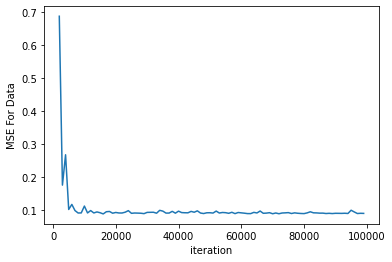

In [34]:
plt.xlabel("iteration")
plt.ylabel("MSE For Data")
plt.plot(iteration_list[2:],Train_MSE_list[2:])

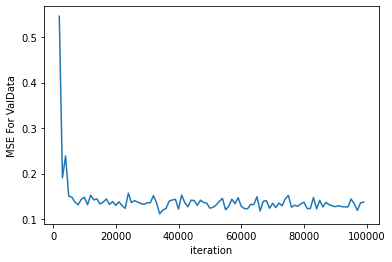

In [35]:
plt.xlabel("iteration")
plt.ylabel("MSE For ValData")
plt.plot(iteration_list[2:],Val_MSE_list[2:])